In [156]:
# from google.colab import files
# files.upload()

In [157]:
# !rm -r ~/.kaggle
# !mkdir ~/.kaggle
# !mv ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [158]:
# ! kaggle datasets download -d jessemostipak/hotel-booking-demand

In [159]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/hotel-booking-demand.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [160]:
import numpy as np
import pandas as pd
import time
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# EDA

In [161]:
df = pd.read_csv("hotel_bookings.csv")
target = np.array(df['is_canceled'])
df.drop(columns='is_canceled', inplace=True, errors='raise')
df.drop(columns='reservation_status', inplace=True, errors='raise') # Too close to Target
##
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) # As date type
df['reservation_status_year']= df['reservation_status_date'].dt.year
df['reservation_status_month']= df['reservation_status_date'].dt.month
df['reservation_status_day']= df['reservation_status_date'].dt.day
df.drop(columns='reservation_status_date', inplace=True, errors='raise')
## 
df['is_repeated_guest'] = df['is_repeated_guest'].astype("object") # as object

### Split dataset

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0, stratify = target)

In [163]:
X_train.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace = True)

In [164]:
X_train.shape

(95512, 32)

In [165]:
pd.value_counts(X_train.dtypes)

int64      17
object     11
float64     4
dtype: int64

In [166]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95512 entries, 0 to 95511
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   lead_time                       95512 non-null  int64  
 2   arrival_date_year               95512 non-null  int64  
 3   arrival_date_month              95512 non-null  object 
 4   arrival_date_week_number        95512 non-null  int64  
 5   arrival_date_day_of_month       95512 non-null  int64  
 6   stays_in_weekend_nights         95512 non-null  int64  
 7   stays_in_week_nights            95512 non-null  int64  
 8   adults                          95512 non-null  int64  
 9   children                        95508 non-null  float64
 10  babies                          95512 non-null  int64  
 11  meal                            95512 non-null  object 
 12  country                         

In [167]:
X_train.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  95512.000000       95512.000000              95512.000000   
mean     103.752775        2016.155719                 27.143657   
std      106.614986           0.707769                 13.607703   
min        0.000000        2015.000000                  1.000000   
25%       18.000000        2016.000000                 16.000000   
50%       69.000000        2016.000000                 27.000000   
75%      160.000000        2017.000000                 38.000000   
max      737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               95512.000000             95512.000000   
mean                   15.797648                 0.927349   
std                     8.775192                 1.000397   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights        adults      children        babies  \
count          95512.000000  95512.000000  95508.000000  95512.000000   
mean               2.499864      1.856405      0.104096      0.008093   
std                1.910193      0.561096      0.399999      0.099981   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               50.000000     50.000000     10.000000     10.000000   

       previous_cancellations  ...  booking_changes         agent  \
count            95512.000000  ...     95512.000000  82421.000000   
mean                 0.086251  ...         0.221794     86.619891   
std                  0.826625  ...         0.646156    110.775007   
min                  0.000000  ...         0.000000      1.000000   
25%                  0.000000  ...         0.000000      9.000000   
50%                  0.000000  ...         0.000000     14.000000   
75%                  0.000000  ...         0.000000    229.000000   
max                 26.000000  ...        20.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  5451.000000          95512.000000  95512.000000   
mean    189.159237              2.291283    101.823356   
std     131.557197             17.372183     48.111724   
min       6.000000              0.000000     -6.380000   
25%      62.000000              0.000000     69.370000   
50%     179.000000              0.000000     94.935000   
75%     269.000000              0.000000    126.000000   
max     543.000000            391.000000    510.000000   

       required_car_parking_spaces  total_of_special_requests  \
count                 95512.000000               95512.000000   
mean                      0.062285                   0.571415   
std                       0.245244                   0.793243   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.000000                   5.000000   

       reservation_status_year  reservation_status_month  \
count             95512.000000              95512.000000   
mean               2016.093339                  6.329278   
std                   0.715214                  3.346097   
min                2014.000000                  1.000000   
25%                2016.000000                  3.000000   
50%                2016.000000                  6.000000   
75%                2017.000000        

In [168]:
X_train.nunique()

hotel                                2
lead_time                          477
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              13
children                             5
babies                               5
meal                                 5
country                            168
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              14
previous_bookings_not_canceled      65
reserved_room_type                  10
assigned_room_type                  11
booking_changes                     18
deposit_type                         3
agent                              324
company                            333
days_in_waiting_list               122
customer_type            

In [169]:
X_train.select_dtypes(exclude=['object']).nunique()

lead_time                          477
arrival_date_year                    3
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              13
children                             5
babies                               5
previous_cancellations              14
previous_bookings_not_canceled      65
booking_changes                     18
agent                              324
company                            333
days_in_waiting_list               122
adr                               7959
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status_year              4
reservation_status_month            12
reservation_status_day              31
dtype: int64

In [170]:
X_train.select_dtypes(include=['object']).nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 168
market_segment            8
distribution_channel      5
is_repeated_guest         2
reserved_room_type       10
assigned_room_type       11
deposit_type              3
customer_type             4
dtype: int64

In [171]:
temp_data= X_train.isna().mean().sort_values()
temp_data

hotel                             0.000000
reservation_status_year           0.000000
total_of_special_requests         0.000000
required_car_parking_spaces       0.000000
adr                               0.000000
customer_type                     0.000000
days_in_waiting_list              0.000000
deposit_type                      0.000000
booking_changes                   0.000000
assigned_room_type                0.000000
reserved_room_type                0.000000
previous_bookings_not_canceled    0.000000
previous_cancellations            0.000000
reservation_status_month          0.000000
is_repeated_guest                 0.000000
market_segment                    0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
distribution_channel              0.000000
reservation

In [172]:
X_train.head(5)

hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        164               2016           December   
1    City Hotel         54               2017            January   
2    City Hotel         23               2016           December   
3  Resort Hotel          4               2016           February   
4    City Hotel          7               2015             August   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        52                         24   
1                         2                         14   
2                        49                          3   
3                         9                         24   
4                        36                         31   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        2                     3       1       0.0  ...   
1                        0                     1       3       0.0  ...   
2                        0                     1       2       0.0  ...   
3                        0                     4       2       0.0  ...   
4                        1                     2       1       0.0  ...   

   agent company days_in_waiting_list    customer_type     adr  \
0  314.0     NaN                    0        Transient   54.64   
1    9.0     NaN                    0        Transient  138.60   
2   14.0     NaN                    0        Transient   79.20   
3  115.0     NaN                    0        Transient   28.10   
4    1.0     NaN                    0  Transient-Party   60.00   

  required_car_parking_spaces  total_of_special_requests  \
0                           0                          0   
1                           0                          0   
2                           0                          1   
3                           0                          0   
4                           0                          0   

   reservation_status_year reservation_status_month reservation_status_day  
0                     2016                       12                     29  
1                     2016                       12                     27  
2                     2016                       12                      4  
3                     2016                        2                     28  
4                     2015                        9                      3  

[5 rows x 32 columns]

In [173]:
fig= make_subplots(rows=1,cols=2,
                  subplot_titles=("Null Value ratio column wise", "HeatMap for Null Values (0 -> Not Null & 1 -> Null)")
                  )



temp_data= X_train.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        X_train.isna().astype(np.int8)
                       ).data[0],
              row=1,col=2)

fig.update_layout(showlegend=False)
fig.show()

In [174]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=X_train.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#016CC9')),
    row=1, col=1
)



temp_data=X_train.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

#fig.update_layout(showlegend=False)
fig.show()

### Drop columns with excessive miss data

In [175]:
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
drop_columns = X_train.columns[percent_missing >= 40]

In [176]:
X_train.drop(columns=drop_columns, inplace= True, errors='raise')
X_test.drop(columns=drop_columns, inplace= True, errors='raise')

In [177]:
temp_data= X_train.isna().mean().sort_values()
temp_data

hotel                             0.000000
reservation_status_year           0.000000
total_of_special_requests         0.000000
required_car_parking_spaces       0.000000
adr                               0.000000
customer_type                     0.000000
days_in_waiting_list              0.000000
deposit_type                      0.000000
booking_changes                   0.000000
assigned_room_type                0.000000
reserved_room_type                0.000000
previous_bookings_not_canceled    0.000000
previous_cancellations            0.000000
reservation_status_month          0.000000
is_repeated_guest                 0.000000
market_segment                    0.000000
meal                              0.000000
babies                            0.000000
adults                            0.000000
stays_in_week_nights              0.000000
stays_in_weekend_nights           0.000000
arrival_date_day_of_month         0.000000
arrival_date_week_number          0.000000
arrival_dat

### Fill columns with median 
median is better 

In [178]:
def fill_blanks (df):
    dict_fills = {}
    for each_column in df.columns:
        if each_column in df.select_dtypes(['object']).columns:
            dict_fills[each_column] = df[each_column].mode()[0]
        elif each_column in df.select_dtypes(['float64']).columns:
            dict_fills[each_column] = df[each_column].median()
        else:
            dict_fills[each_column] = df[each_column].median()
    return(dict_fills)

In [179]:
dict_fills = fill_blanks(X_train)
dict_fills

{'hotel': 'City Hotel',
 'lead_time': 69.0,
 'arrival_date_year': 2016.0,
 'arrival_date_month': 'August',
 'arrival_date_week_number': 27.0,
 'arrival_date_day_of_month': 16.0,
 'stays_in_weekend_nights': 1.0,
 'stays_in_week_nights': 2.0,
 'adults': 2.0,
 'children': 0.0,
 'babies': 0.0,
 'meal': 'BB',
 'country': 'PRT',
 'market_segment': 'Online TA',
 'distribution_channel': 'TA/TO',
 'is_repeated_guest': 0,
 'previous_cancellations': 0.0,
 'previous_bookings_not_canceled': 0.0,
 'reserved_room_type': 'A',
 'assigned_room_type': 'A',
 'booking_changes': 0.0,
 'deposit_type': 'No Deposit',
 'agent': 14.0,
 'days_in_waiting_list': 0.0,
 'customer_type': 'Transient',
 'adr': 94.935,
 'required_car_parking_spaces': 0.0,
 'total_of_special_requests': 0.0,
 'reservation_status_year': 2016.0,
 'reservation_status_month': 6.0,
 'reservation_status_day': 16.0}

In [180]:
X_train.fillna(dict_fills, inplace = True)
X_test.fillna(dict_fills, inplace = True)

In [181]:
temp_data= X_train.isna().mean().sort_values()
temp_data

hotel                             0.0
reservation_status_year           0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
reservation_status_month          0.0
is_repeated_guest                 0.0
market_segment                    0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date_week_number          0.0
arrival_date

### Analysis Numerical Columns

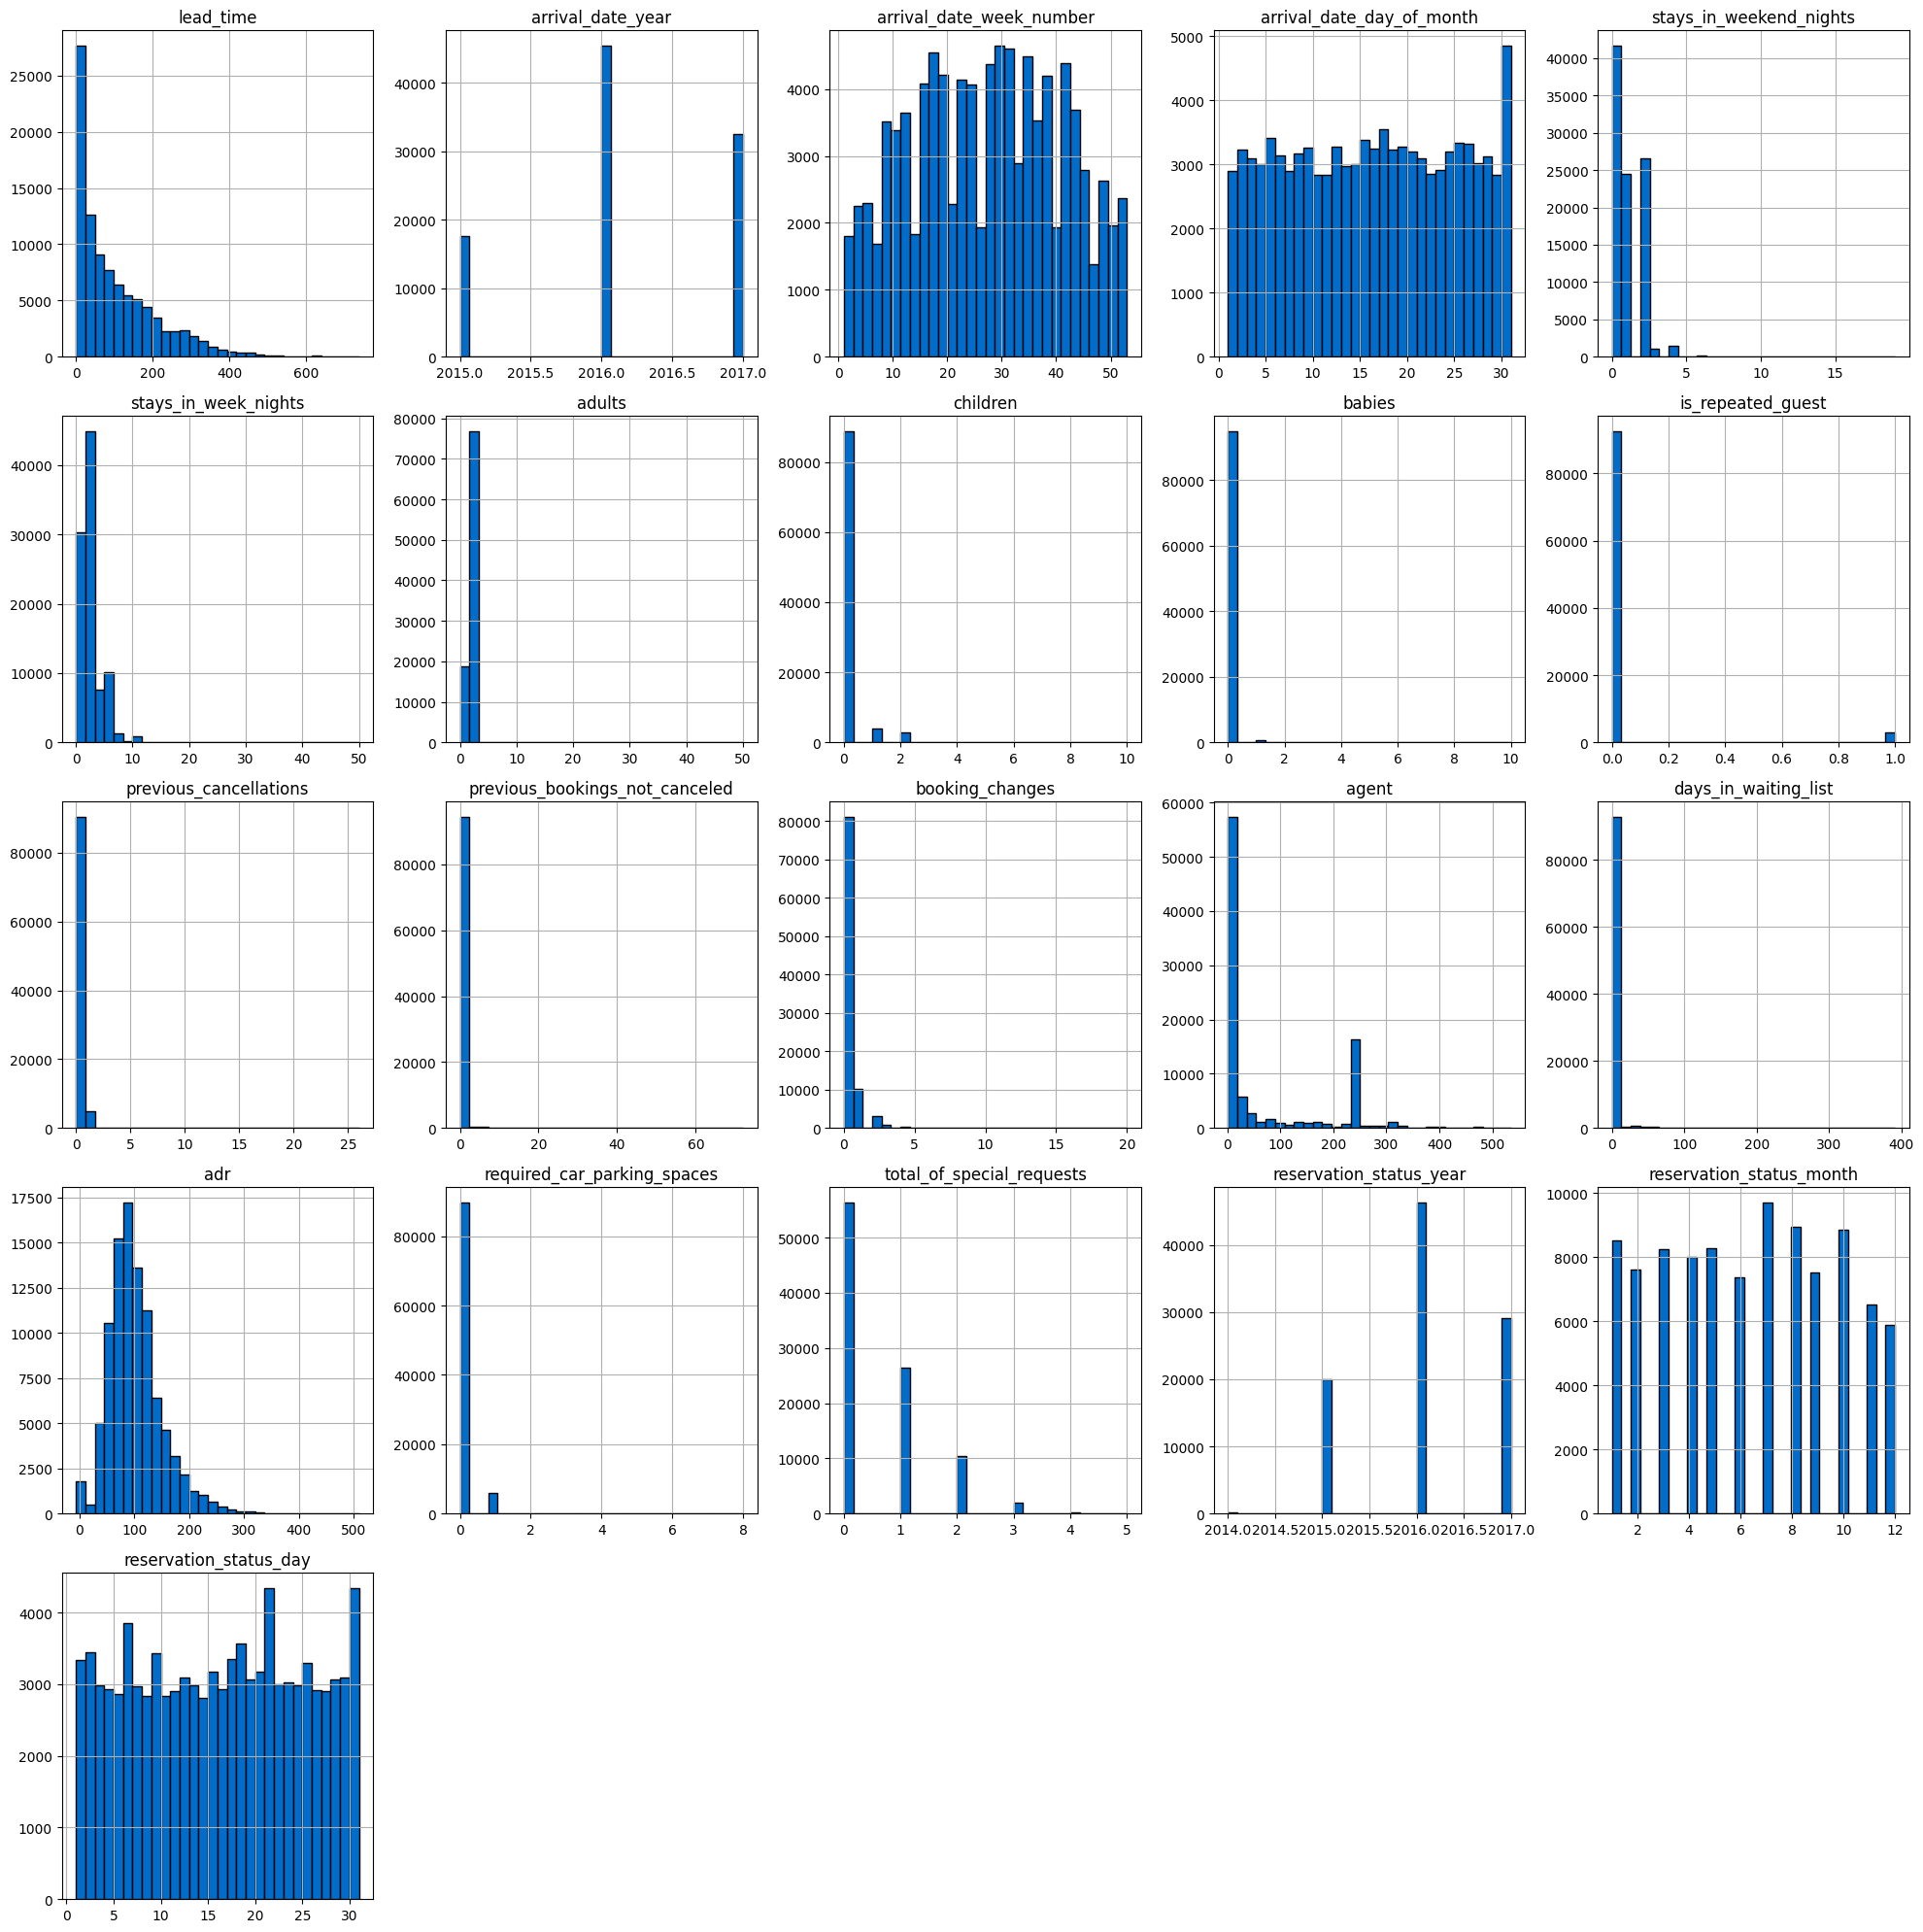

In [182]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(20,20)
X_train.hist(bins=30, figsize=figsize_val, edgecolor="black",color='#016CC9')
plt.tight_layout()

### Analysis Categorical Columns

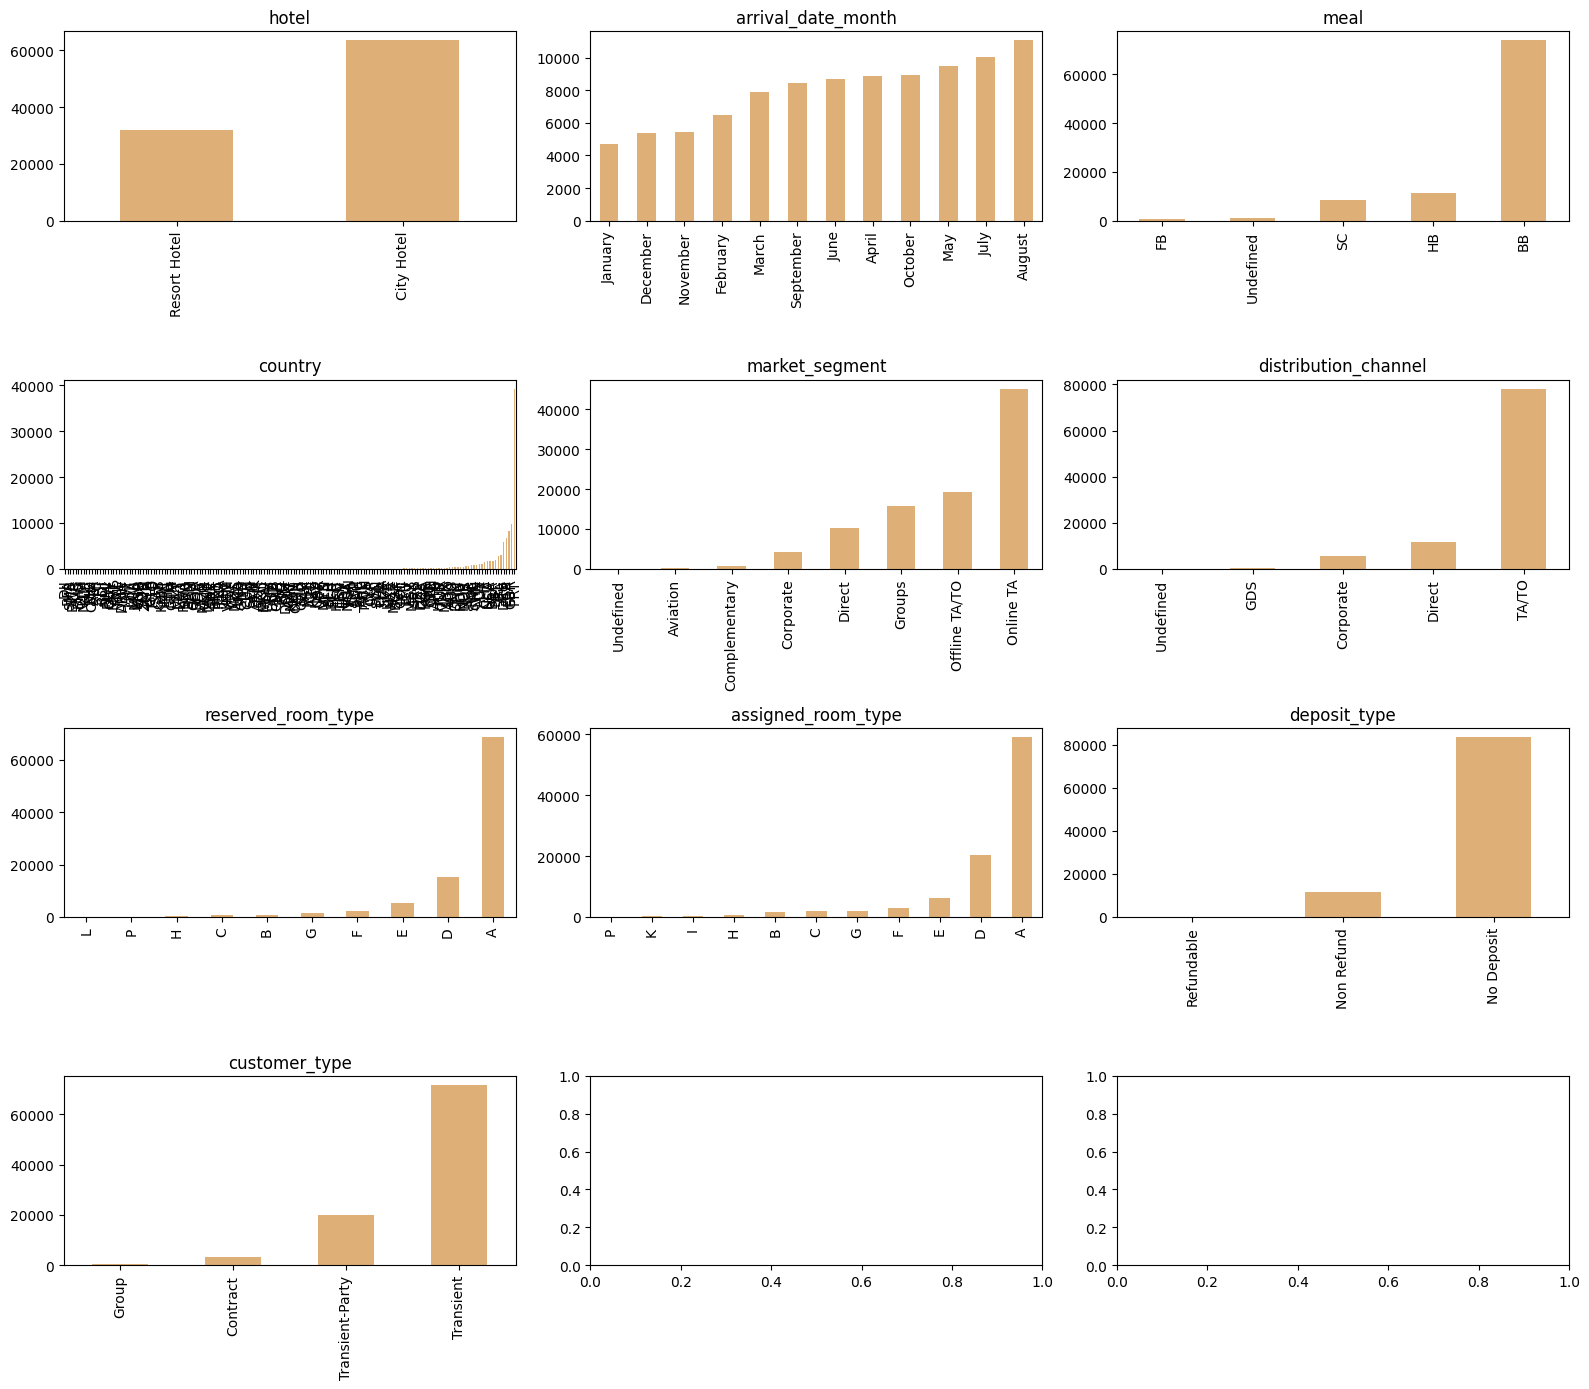

In [183]:
fields=X_train.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    X_train[fields[i-1]].value_counts().sort_values().plot.bar(color='#DEB078')
    plt.xticks(rotation=90)
    plt.title(fields[i-1])

plt.tight_layout()
plt.show()

### Analysis Target Variable

In [184]:
a, b = np.unique(y_train, return_counts=True)

In [185]:
b = b / np.sum(b)

In [186]:
b

array([0.62958581, 0.37041419])

In [187]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12),
                           height=500, width=1000))

In [188]:
pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
fig=go.Figure()

fig.add_trace(go.Pie(labels=a, values=b, hole=.5,
                     showlegend=True,sort=False,
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} : %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution',
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

# Feture Reduction

### Correlation with numerical columns

In [189]:
def correlation(dataset, threshold):
    col_corr = []# Set of all the names of deleted columns
    corr_matrix = abs(dataset.corr(numeric_only=True)) > threshold
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] == True) :
                colname_1 = corr_matrix.columns[i] # getting the name of column
                colname_2 = corr_matrix.columns[j] # getting the name of column
                col_corr.append((colname_1, colname_2))

    print(col_corr)

In [190]:
correlation(X_train, 0.8)

[('reservation_status_year', 'arrival_date_year')]


#### Delete correlated columns

In [191]:
X_train.drop(columns='arrival_date_year', inplace=True, errors='raise')
X_test.drop(columns='arrival_date_year', inplace=True, errors='raise')

In [192]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

### Chi-square for categorical features

In [193]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

for cat_1 in categorical_columns:
    for cat_2 in categorical_columns:
        # defining the table
        crosstab_ = pd.crosstab(X_train[cat_1], X_train[cat_2], margins = True, margins_name = "Total")
        stat, p, dof, expected = chi2_contingency(crosstab_)
        # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print(cat_1, cat_2, 'Dependent (reject H0)')
        else:
            print(cat_1, cat_2, 'Independent (H0 holds true)')
        print()

p value is 0.0
hotel hotel Dependent (reject H0)

p value is 1.011577286993307e-84
hotel arrival_date_month Dependent (reject H0)



p value is 0.0
hotel meal Dependent (reject H0)

p value is 0.0
hotel country Dependent (reject H0)

p value is 0.0
hotel market_segment Dependent (reject H0)

p value is 0.0
hotel distribution_channel Dependent (reject H0)

p value is 0.0
hotel reserved_room_type Dependent (reject H0)

p value is 0.0
hotel assigned_room_type Dependent (reject H0)

p value is 0.0
hotel deposit_type Dependent (reject H0)

p value is 1.743138234560676e-45
hotel customer_type Dependent (reject H0)

p value is 1.011577286993307e-84
arrival_date_month hotel Dependent (reject H0)

p value is 0.0
arrival_date_month arrival_date_month Dependent (reject H0)

p value is 0.0
arrival_date_month meal Dependent (reject H0)

p value is 0.0
arrival_date_month country Dependent (reject H0)

p value is 0.0
arrival_date_month market_segment Dependent (reject H0)

p value is 0.0
arrival_date_month distribution_channel Dependent (reject H0)

p value is 7.596423130727471e-306
arrival_date_month reserved_room_type Dependent 

In [194]:
numerical_columns = X_train.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_year',
 'reservation_status_month',
 'reservation_status_day']

### Normalize numerical features

In [195]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train [numerical_columns])

StandardScaler()

In [196]:
X_train[numerical_columns] = sc.transform(X_train [numerical_columns])
X_test[numerical_columns] = sc.transform(X_test [numerical_columns])


In [197]:
X_train.head(5)

hotel  lead_time arrival_date_month  arrival_date_week_number  \
0  Resort Hotel   0.565094           December                  1.826647   
1    City Hotel  -0.466661            January                 -1.847761   
2    City Hotel  -0.757428           December                  1.606183   
3  Resort Hotel  -0.935640           February                 -1.333344   
4    City Hotel  -0.907502             August                  0.650836   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                   0.934725                 1.072230              0.261826   
1                  -0.204857                -0.926986             -0.785194   
2                  -1.458397                -0.926986             -0.785194   
3                   0.934725                -0.926986              0.785336   
4                   1.732433                 0.072622             -0.261684   

     adults  children    babies  ... deposit_type     agent  \
0 -1.526316 -0.260236 -0.080948  ...   No Deposit  2.241308   
1  2.038155 -0.260236 -0.080948  ...   No Deposit -0.639023   
2  0.255919 -0.260236 -0.080948  ...   No Deposit -0.591804   
3  0.255919 -0.260236 -0.080948  ...   No Deposit  0.362010   
4 -1.526316 -0.260236 -0.080948  ...   No Deposit -0.714572   

  days_in_waiting_list    customer_type       adr  \
0            -0.131894        Transient -0.980709   
1            -0.131894        Transient  0.764405   
2            -0.131894        Transient -0.470228   
3            -0.131894        Transient -1.532345   
4            -0.131894  Transient-Party -0.869301   

   required_car_parking_spaces  total_of_special_requests  \
0                    -0.253975                  -0.720357   
1                    -0.253975                  -0.720357   
2                    -0.253975                   0.540297   
3                    -0.253975                  -0.720357   
4                    -0.253975                  -0.720357   

  reservation_status_year reservation_status_month  reservation_status_day  
0               -0.130506                 1.694736                1.517441  
1               -0.130506                 1.694736                1.289514  
2               -0.130506                 1.694736               -1.331652  
3               -0.130506                -1.293836                1.403477  
4               -1.528695                 0.798164               -1.445616  

[5 rows x 30 columns]

In [198]:
X_test.head(5)

hotel  lead_time arrival_date_month  arrival_date_week_number  \
0    City Hotel  -0.363485              March                 -1.186368   
1  Resort Hotel  -0.973159           December                  1.679671   
2    City Hotel  -0.945020           December                  1.826647   
3    City Hotel  -0.597975             August                  0.577348   
4    City Hotel   0.302466          September                  0.724325   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                  -0.432773                 1.072230             -0.261684   
1                  -0.660690                -0.926986             -0.785194   
2                   0.592851                -0.926986              0.785336   
3                   1.504516                -0.926986             -0.785194   
4                  -1.344439                 1.072230             -0.261684   

     adults  children    babies  ... deposit_type     agent  \
0  0.255919 -0.260236 -0.080948  ...   No Deposit  0.579215   
1 -1.526316 -0.260236 -0.080948  ...   No Deposit -0.591804   
2  0.255919 -0.260236 -0.080948  ...   No Deposit -0.648466   
3 -1.526316 -0.260236 -0.080948  ...   No Deposit -0.591804   
4  0.255919 -0.260236 -0.080948  ...   No Deposit  0.078699   

  days_in_waiting_list customer_type       adr  required_car_parking_spaces  \
0            -0.131894     Transient -0.599095                    -0.253975   
1            -0.131894     Transient -1.326572                    -0.253975   
2            -0.131894     Transient -0.711958                    -0.253975   
3            -0.131894     Transient -0.141824                    -0.253975   
4            -0.131894     Transient -0.438011                    -0.253975   

   total_of_special_requests reservation_status_year reservation_status_month  \
0                   0.540297                1.267684                -0.994979   
1                  -0.720357               -1.528695                 1.694736   
2                   0.540297               -0.130506                 1.694736   
3                  -0.720357                1.267684                 0.499307   
4                  -0.720357               -0.130506                 0.798164   

   reservation_status_day  
0                0.035913  
1               -0.533906  
2                1.061586  
3                1.631405  
4               -0.875797  

[5 rows x 30 columns]

### Onehot Encoder categorical features

In [199]:
from sklearn import preprocessing

def ohencoder (df):
    # creating instance of one-hot-encoder
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    onehotencoder_data = enc.fit_transform(df[df.select_dtypes(['object']).columns]).toarray()
    list_columns_name = []
    for i in range(len(onehotencoder_data[0])):
        list_columns_name.append('Type '+ str(i+1))
    enc_df = pd.DataFrame(data=onehotencoder_data , columns= list_columns_name)
    # merge with main df bridge_df on key values
    df = df.join(enc_df)
    for col in df.select_dtypes(['object']).columns:
        df.drop(col, axis=1, inplace=True)

    return (df, enc)

In [200]:
def test_ohencoder (X_test, enc):
    onehotencoder_data = enc.transform(X_test[X_test.select_dtypes(['object']).columns]).toarray()
    list_columns_name = []
    for i in range(len(onehotencoder_data[0])):
        list_columns_name.append('Type '+ str(i+1))
    enc_test = pd.DataFrame(data=onehotencoder_data , columns= list_columns_name)

    X_test = X_test.join(enc_test)
    for col in X_test.select_dtypes(['object']).columns:
        X_test.drop(col, axis=1, inplace=True)

    return(X_test)

In [201]:
X_train, transfer_onehot = ohencoder(X_train)
X_test = test_ohencoder (X_test, transfer_onehot)

In [202]:
X_train.shape

(95512, 248)

In [203]:
for col in X_train.columns:
    print(col)

lead_time
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
agent
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests
reservation_status_year
reservation_status_month
reservation_status_day
Type 1
Type 2
Type 3
Type 4
Type 5
Type 6
Type 7
Type 8
Type 9
Type 10
Type 11
Type 12
Type 13
Type 14
Type 15
Type 16
Type 17
Type 18
Type 19
Type 20
Type 21
Type 22
Type 23
Type 24
Type 25
Type 26
Type 27
Type 28
Type 29
Type 30
Type 31
Type 32
Type 33
Type 34
Type 35
Type 36
Type 37
Type 38
Type 39
Type 40
Type 41
Type 42
Type 43
Type 44
Type 45
Type 46
Type 47
Type 48
Type 49
Type 50
Type 51
Type 52
Type 53
Type 54
Type 55
Type 56
Type 57
Type 58
Type 59
Type 60
Type 61
Type 62
Type 63
Type 64
Type 65
Type 66
Type 67
Type 68
Type 69
Type 70
Type 71
Type 72
Type 73
Type 74
Type 75
Type 76
Type 77
Type 78
Type 79
Typ

# Base Classifier 

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def base_classifier(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(metrics.classification_report(y_test, predict))

    cm = confusion_matrix(y_test, predict, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [205]:
X_train.shape

(95512, 248)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     15033
           1       1.00      0.35      0.52      8845

    accuracy                           0.76     23878
   macro avg       0.86      0.68      0.68     23878
weighted avg       0.83      0.76      0.72     23878



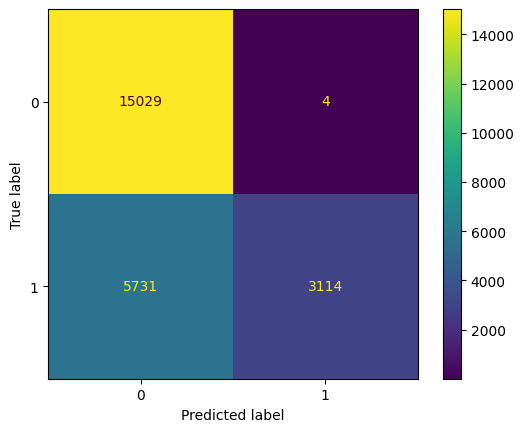

In [206]:
base_classifier(X_train, y_train, X_test, y_test)

## Feature Selection

### Removing features with low variance

In [207]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold= 0.1)
sel.fit(X_train)

VarianceThreshold(threshold=0.1)

In [208]:
X_train_reducted = sel.transform(X_train)
X_test_reducted = sel.transform(X_test)
X_train_reducted.shape

(95512, 39)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15033
           1       1.00      0.37      0.54      8845

    accuracy                           0.77     23878
   macro avg       0.86      0.68      0.69     23878
weighted avg       0.83      0.77      0.73     23878



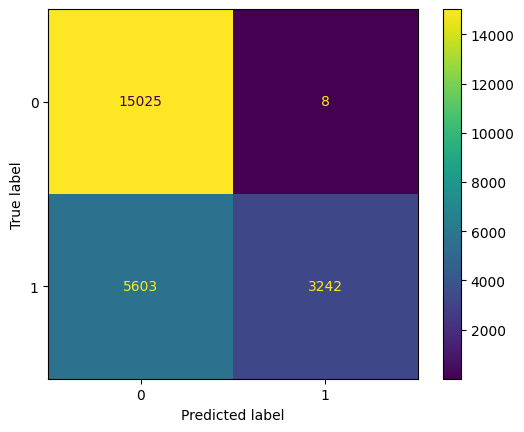

In [209]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

### Mutual Information

In [210]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

skb = SelectKBest(mutual_info_classif, k = 30) 
skb.fit(X_train, y_train)

SelectKBest(k=30,
            score_func=<function mutual_info_classif at 0x0000024F3698C310>)

In [211]:
X_train_reducted = skb.transform(X_train)
X_test_reducted = skb.transform(X_test)
X_train_reducted.shape

(95512, 30)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15033
           1       1.00      0.37      0.54      8845

    accuracy                           0.77     23878
   macro avg       0.86      0.68      0.69     23878
weighted avg       0.83      0.77      0.73     23878



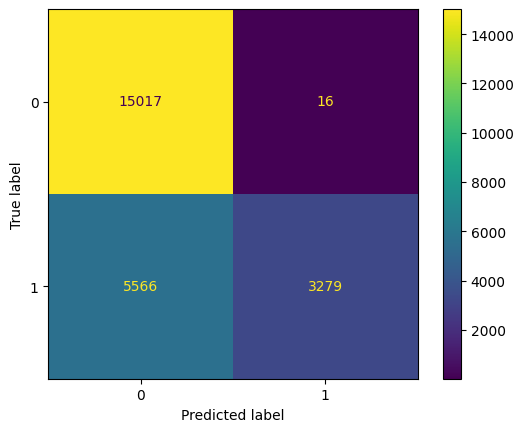

In [212]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

### Feature selection using SelectFromModel

In [213]:
from sklearn.feature_selection import SelectFromModel

##### L1-Norm

In [214]:
from sklearn.svm import LinearSVC

sfm = LinearSVC(C=0.01, penalty="l1", dual=False)
sfm.fit(X_train, y_train)

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=0.01, dual=False, penalty='l1')

In [215]:
np.argsort(sfm.coef_), np.sum(sfm.coef_ == 0)

(array([[241,  15, 220,  38,  80,  16, 212,  18,  49,  52, 154,  96,  91,
         216,  93, 235, 236,  27,  10,  17,  11, 185,  21,  23,  36, 209,
          66, 111,  71,  33,  29,   8, 243,  13, 210,  28,  19, 244, 234,
          26, 164, 165, 163, 162, 123, 168, 169, 161, 170, 172, 173, 174,
         175, 176, 177, 167, 160, 149, 158, 134, 135, 136, 137, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 155,
         156, 157, 159, 178, 193, 180, 207, 211, 214, 217, 218, 219, 221,
         222, 223, 206, 225, 227, 228, 229, 232, 237, 238, 239, 240, 245,
         226, 205, 204, 203, 181, 182, 183, 184, 186, 187, 188, 189, 190,
         191, 192, 133, 194, 195, 196, 197, 198, 199, 200, 201, 202, 179,
         132, 247, 130,  59,  60,  61,  63,  64,  65,  67,  69, 131,  72,
          73,  74,  75,  76,  77,  78,  79,  81,  82,  58,  83,  57,  55,
           7,  20,  25,  30,  34,  35,  39,  41,  42,  43,  44,  45,  46,
          47,  48,  50,  51,  53,  54,

In [216]:
model = SelectFromModel(sfm, prefit=True)

In [217]:
X_train_reducted = model.transform(X_train)
X_test_reducted = model.transform(X_test)
X_train_reducted.shape

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:402: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:402: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



(95512, 73)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15033
           1       0.99      0.36      0.53      8845

    accuracy                           0.76     23878
   macro avg       0.86      0.68      0.69     23878
weighted avg       0.83      0.76      0.73     23878



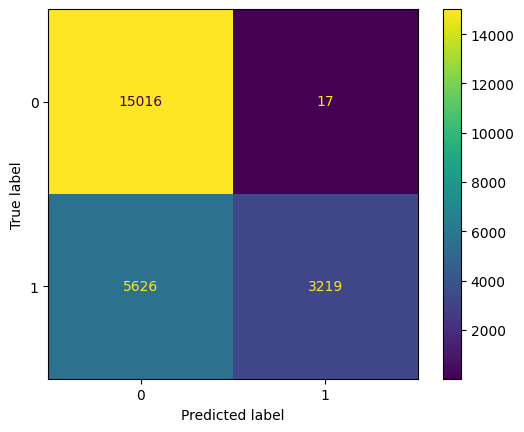

In [218]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

##### Decision Tree

In [219]:
from sklearn.tree import DecisionTreeClassifier

sfm = DecisionTreeClassifier(max_depth=3)
sfm.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [220]:
model = SelectFromModel(sfm, prefit=True)

In [221]:
X_train_reducted = model.transform(X_train)
X_test_reducted = model.transform(X_test)
X_train_reducted.shape

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:402: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:402: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



(95512, 4)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     15033
           1       0.74      0.57      0.64      8845

    accuracy                           0.77     23878
   macro avg       0.76      0.73      0.74     23878
weighted avg       0.76      0.77      0.76     23878



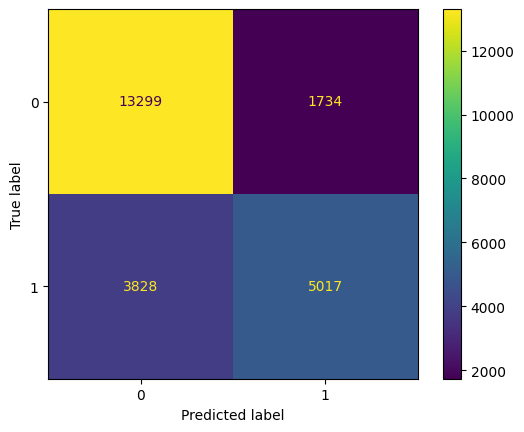

In [222]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

## Feature Extraction

### Principle Components Analysis (PCA)

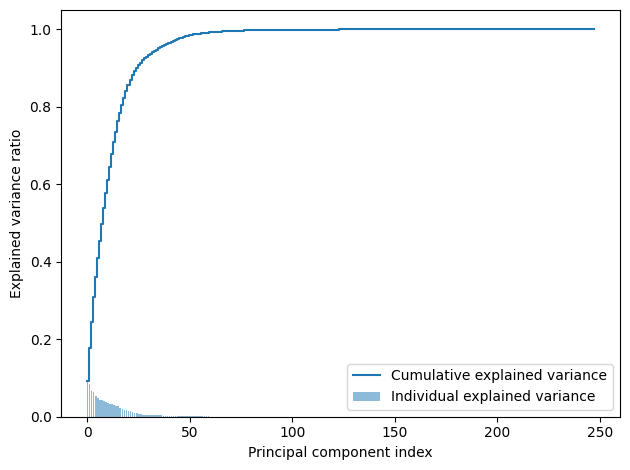

In [223]:
from sklearn.decomposition import PCA

#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [224]:
X_train_pca.shape

(95512, 248)

In [225]:
X_test_pca = pca.transform(X_test)

In [226]:
X_train_reducted = X_train_pca[:, :30]
X_test_reducted = X_test_pca[:, :30]
X_train_reducted.shape

(95512, 30)

              precision    recall  f1-score   support

           0       0.77      0.99      0.87     15033
           1       0.97      0.50      0.66      8845

    accuracy                           0.81     23878
   macro avg       0.87      0.74      0.76     23878
weighted avg       0.84      0.81      0.79     23878



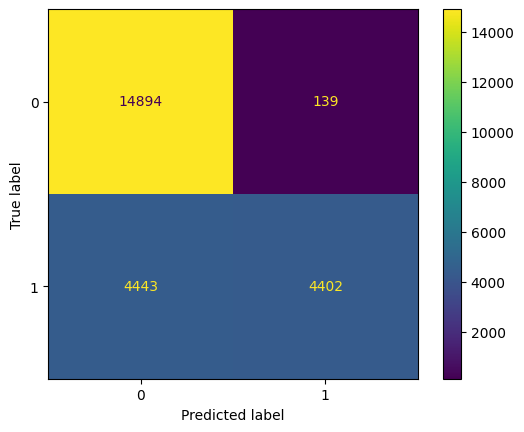

In [227]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

### Independent Component Analysis (ICA)

In [228]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=30)
ica.fit(X_train)

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.

C:\Users\Hosein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



FastICA(n_components=30)

In [229]:
X_train_reducted = ica.transform(X_train)
X_test_reducted = ica.transform(X_test)
X_train_reducted.shape

(95512, 30)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     15033
           1       0.99      0.73      0.84      8845

    accuracy                           0.90     23878
   macro avg       0.93      0.86      0.88     23878
weighted avg       0.91      0.90      0.89     23878



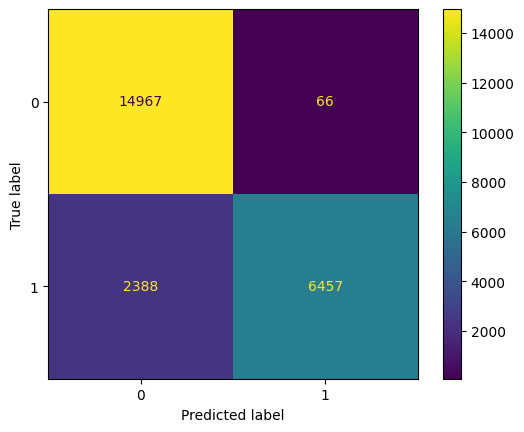

In [230]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

### Linear Discriminant Analysis (LDA)

In [231]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [232]:
X_train_reducted = lda.transform(X_train)
X_test_reducted = lda.transform(X_test)
X_train_reducted.shape

(95512, 1)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     15033
           1       0.80      0.69      0.74      8845

    accuracy                           0.82     23878
   macro avg       0.82      0.80      0.80     23878
weighted avg       0.82      0.82      0.82     23878



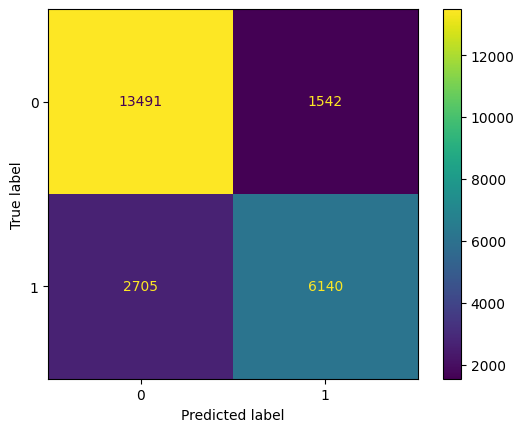

In [233]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [234]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [235]:
X_train_reducted = tsne.fit_transform(X_train)
X_test_reducted = tsne.fit_transform(X_test)
X_train_reducted.shape

(95512, 2)

              precision    recall  f1-score   support

           0       0.68      0.98      0.80     15033
           1       0.85      0.22      0.35      8845

    accuracy                           0.70     23878
   macro avg       0.77      0.60      0.58     23878
weighted avg       0.74      0.70      0.63     23878



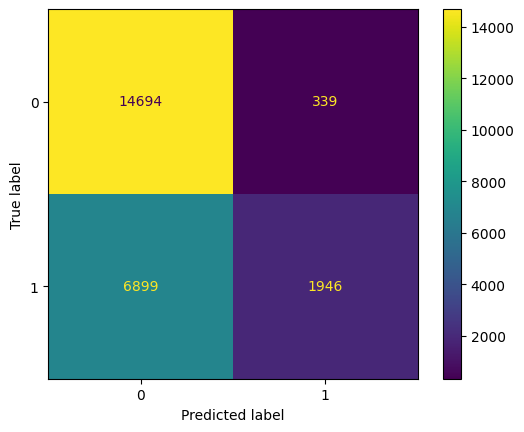

In [236]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)

### Auto Encoder

In [237]:
import tensorflow as tf

class My_AE(tf.keras.Model):

    def __init__(self, input_shape, latent_dim):
        super(My_AE, self).__init__()
        self.latent_dim = latent_dim

        data = tf.keras.layers.Input(shape = (input_shape, ))
        x = tf.keras.layers.Dense(200, activation='elu')(data)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        encoded = tf.keras.layers.Dense(self.latent_dim)(x)
        self.encoder = tf.keras.Model(inputs=[data], outputs=[encoded])

        embedd = tf.keras.layers.Input((self.latent_dim,))
        x = tf.keras.layers.Dense(200, activation='elu')(embedd)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        x = tf.keras.layers.Dense(200, activation='elu')(x)
        decoded = tf.keras.layers.Dense(input_shape, activation='linear')(x)
        self.decoder = tf.keras.Model(inputs=[embedd], outputs=[decoded])

    def call(self, data):
        embed_data = self.encoder(data)
        reconstraction = self.decoder(embed_data)
        return(reconstraction)


In [238]:
auto_encoder = My_AE(X_train.shape[1], 30)
auto_encoder.compile(optimizer='adam', loss = "mse")

In [239]:
auto_encoder.encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 248)]             0         
                                                                 
 dense (Dense)               (None, 200)               49800     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 30)                6030  

In [240]:
auto_encoder.decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_6 (Dense)             (None, 200)               6200      
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dense_8 (Dense)             (None, 200)               40200     
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 248)               4984

In [241]:
history = auto_encoder.fit(X_train, X_train,
    batch_size=64,
    epochs=50,
    verbose="auto",
    validation_split=0.2
    )

Epoch 1/50
1194/1194 [==============================] - 7s 5ms/step - loss: 0.0184 - val_loss: 0.0116
Epoch 2/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0140 - val_loss: 0.0116
Epoch 3/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0115 - val_loss: 0.0124
Epoch 4/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0129 - val_loss: 0.0078
Epoch 5/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0136 - val_loss: 0.0098
Epoch 6/50
1194/1194 [==============================] - 7s 6ms/step - loss: 0.0134 - val_loss: 0.0087
Epoch 7/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0137 - val_loss: 0.0073
Epoch 8/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0100 - val_loss: 0.0078
Epoch 9/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.0126 - val_loss: 0.0088
Epoch 10/50
1194/1194 [==============================] - 6s 5ms/step - loss: 0.010

In [242]:
loss = history.history['loss']
val_loss = history.history['val_loss']

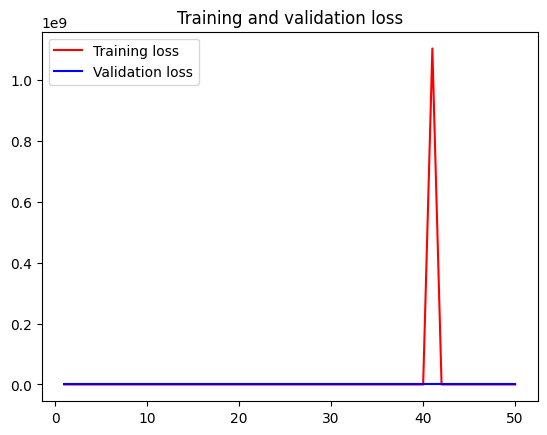

In [243]:
import matplotlib.pyplot as plt
epochs = range(1, len(loss) +1 )
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [244]:
X_train_reducted = auto_encoder.encoder(np.asarray(X_train))
X_test_reducted = auto_encoder.encoder(np.asarray(X_test))
X_train_reducted.shape

TensorShape([95512, 30])

              precision    recall  f1-score   support

           0       0.72      0.97      0.83     15033
           1       0.86      0.37      0.51      8845

    accuracy                           0.74     23878
   macro avg       0.79      0.67      0.67     23878
weighted avg       0.77      0.74      0.71     23878



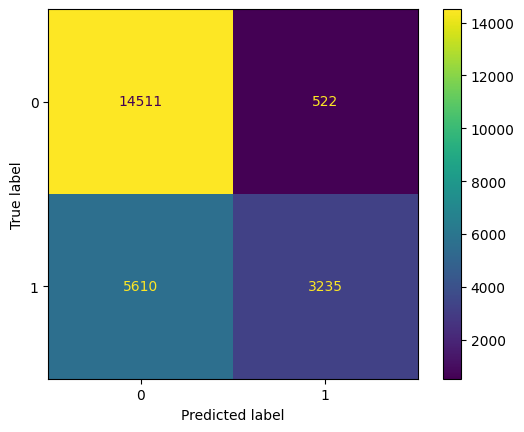

In [245]:
base_classifier(X_train_reducted, y_train, X_test_reducted, y_test)